## Fit execution memory

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def drop_constant_column(dataframe):
    """
    Drops constant value columns of pandas dataframe.
    """
    return dataframe.loc[:, (dataframe != dataframe.iloc[0]).any()]



data = pd.read_csv("26042022_1_m.csv")
data = drop_constant_column(data)
data.describe()


,106,51,69,91,11,22,38,25,24,19,...,34,20,32,68,62,14,7,45,23,x
count,7.690000e+02,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000,7.690000e+02,769.000000,769.000000,...,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000,7.690000e+02,769.000000,7.690000e+02
mean,1.558341e+06,7188.126138,2784.531860,768.680104,11146.512354,2104.276983,444.851756,2.690024e+06,2889.535761,146.057217,...,2431.716515,2260.001300,170.236671,2425.093628,4006.408322,0.007802,6408.635891,1.595353e+05,28609.226268,1.767593e+08
std,3.537463e+06,16572.962403,5857.619078,1864.852188,20251.170328,5838.319461,1202.645496,3.882457e+06,9779.926896,401.112109,...,7240.841873,7239.955847,769.133636,5522.274207,9319.231716,0.088043,19000.366140,3.637674e+05,43890.198394,2.496405e+08
min,1.020000e+02,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.400000e+01,0.000000,7.221360e+05
25%,1.031000e+04,56.000000,15.000000,4.000000,2.000000,17.000000,0.000000,2.030880e+05,0.000000,0.000000,...,0.000000,0.000000,0.000000,16.000000,25.000000,0.000000,0.000000,1.055000e+03,2618.000000,7.343057e+07
50%,1.045300e+04,59.000000,16.000000,4.000000,1994.000000,17.000000,1.000000,1.255816e+06,0.000000,0.000000,...,0.000000,0.000000,0.000000,16.000000,28.000000,0.000000,0.000000,1.071000e+03,10369.000000,1.321491e+08
75%,1.403873e+06,6542.000000,3221.000000,700.000000,13512.000000,17.000000,12.000000,3.550544e+06,948.000000,2.000000,...,1863.000000,896.000000,0.000000,2172.000000,3644.000000,0.000000,3942.000000,1.441420e+05,35470.000000,2.234913e+08
max,3.263177e+07,150474.000000,53425.000000,20650.000000,144342.000000,51247.000000,9468.000000,3.755674e+07,118867.000000,3156.000000,...,72170.000000,72170.000000,8790.000000,51246.000000,83955.000000,1.000000,184457.000000,3.360428e+06,274444.000000,5.849423e+09


In [9]:
# taken from https://towardsdatascience.com/andrew-ngs-machine-learning-course-in-python-linear-regression-dd04fba8e137

def compute_cost(X, y, theta):
    """
    Take in a numpy array X,y, theta and generate the cost function     of using theta as parameter in a linear regression model
    """
    m = len(y)
    predictions = X.dot(theta)
    square_err = (predictions - y) ** 2

    return 1 / (2 * m) * np.sum(square_err)


def gradient_descent(X, y, theta, alpha, num_iters):
    """
    Take in numpy array X, y and theta and update theta by taking   num_iters gradient steps
    with learning rate of alpha

    return theta and the list of the cost of theta during each  iteration
    """

    m = len(y)
    J_history = []

    for i in range(num_iters):
        predictions = X.dot(theta)
        error = np.dot(X.transpose(), (predictions - y))
        descent = alpha * 1 / m * error
        theta -= descent.astype(np.float32)
        J_history.append(compute_cost(X, y, theta))

    return theta, J_history


def feature_normalization(X):
    """
    Take in numpy array of X values and return normalize X values,
    the mean and standard deviation of each feature
    """
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    X_norm = (X - mean) / std

    return X_norm, mean, std


def predict(x, theta):
    """
    Takes in numpy array of x and theta and return the predicted value of y based on theta
    """
    predictions = np.dot(theta.transpose(), x)

    return predictions[0]

In [10]:
data_n = data.values
n = len(data_n[0, :])
m = len(data_n)

# TODO some features should probably be removed due to correlation

X = data_n[:, 1:-1].reshape(m, n - 2)
X = X.astype(np.float32)

X, mean_X, std_X = feature_normalization(X)
X = np.append(np.ones((m, 1)), X, axis=1)
y = data_n[:, -1].reshape(m, 1)
theta = np.zeros((n - 1, 1), dtype=np.float32)

theta, J_history = gradient_descent(X, y, theta, 0.01, 1500)

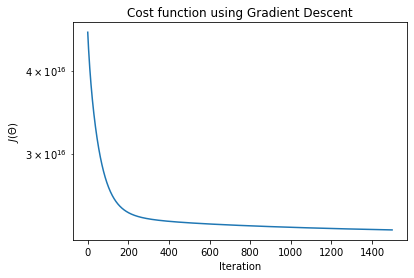

In [11]:
plt.plot(J_history)
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.yscale('log')
plt.title("Cost function using Gradient Descent")

plt.show()

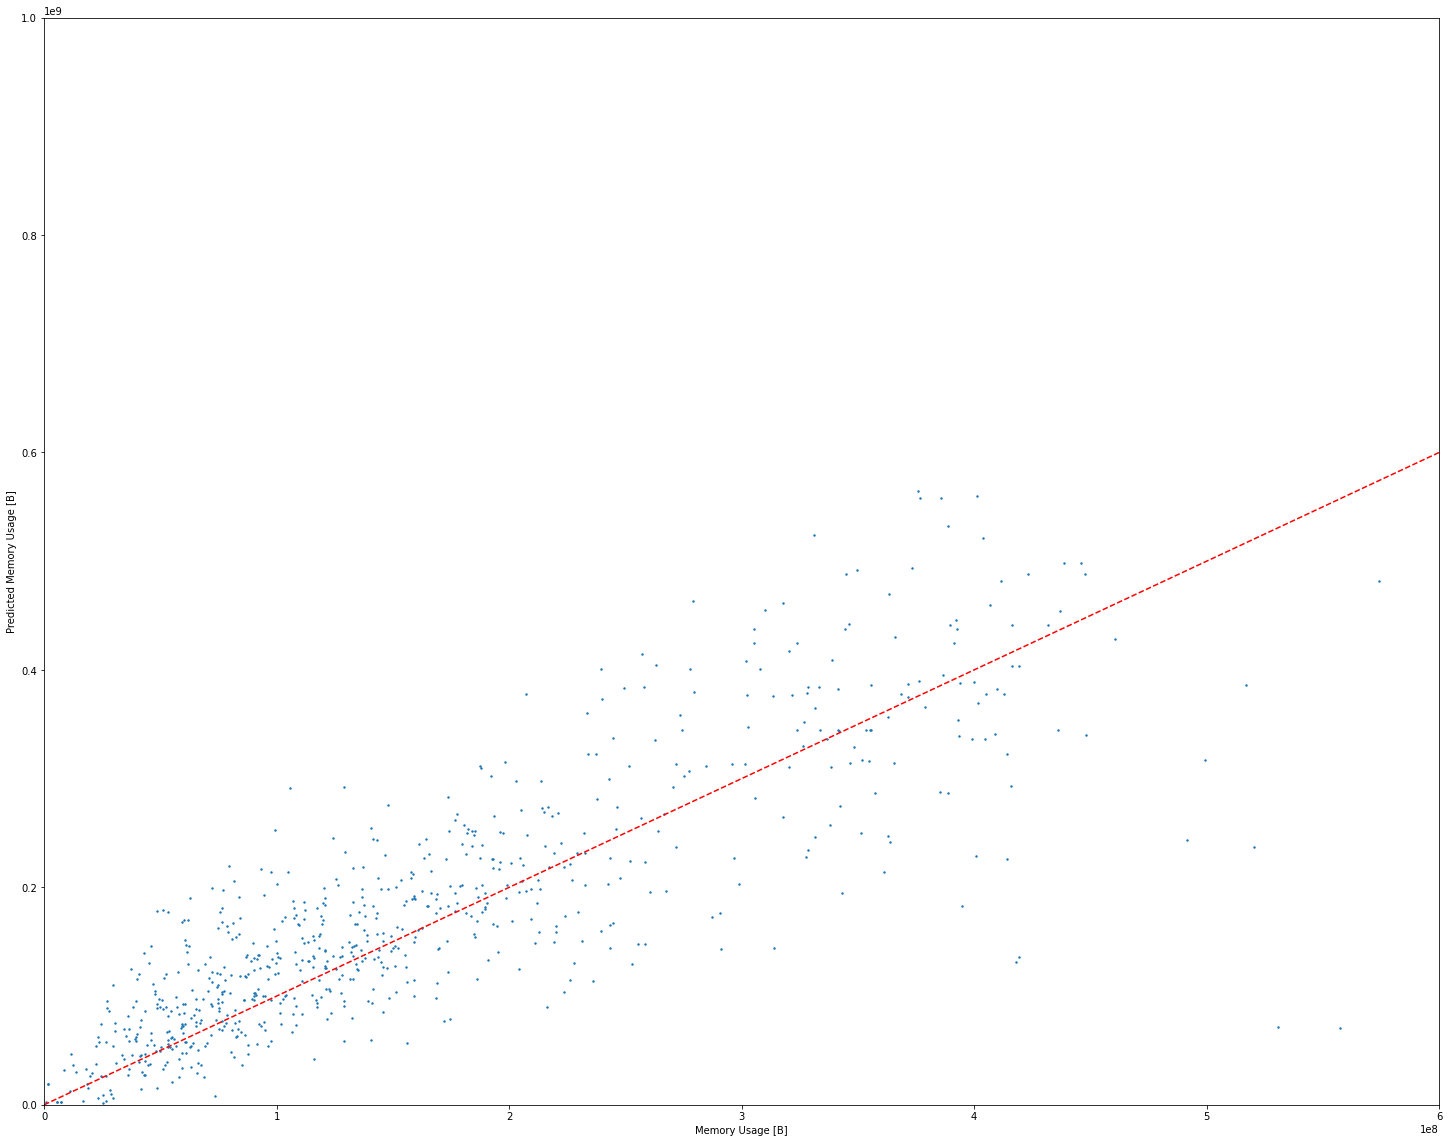

In [19]:
predicted = []
for x in X:
   predicted.append(predict(x,theta))

diag = np.arange(0., 1e9, 10.)

fig, ax = plt.subplots(figsize=(25, 20))
ax.set(xlim=(0, 6e8),ylim=(0, 1e9))
ax.set_xlabel('Memory Usage [B]')
ax.set_ylabel('Predicted Memory Usage [B]')
plt.scatter(y,predicted, s=2)
plt.plot(diag, diag, 'r--')

plt.show()

In [ ]:
theta